Census data is a 2D, each city has its own row number, change column number for city

1: San Francisco

2: Boston

3: Portland

4: Philadelphia

5: Seattle

Next change the income variable below

In [130]:
city_num = 2

Change income bracket that you want to visualize, 

20: 20K to 34K

35: 35K to 49K

50: 50K to 74K

75: 75K+

After you have set both city_num and income, just run all cells

In [131]:
income = 35

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# simply run the file, changing columns depending on what bar chart you want to show up

# read dataset, these are the file locations, so change these depending on your own path
df_10 = pd.read_csv("./data/d2_housingpercent2010.csv")
df_11 = pd.read_csv("./data/d2_housingpercent2011.csv")
df_12 = pd.read_csv("./data/d2_housingpercent2012.csv")
df_13 = pd.read_csv("./data/d2_housingpercent2013.csv")
df_14 = pd.read_csv("./data/d2_housingpercent2014.csv")
df_15 = pd.read_csv("./data/d2_housingpercent2015.csv")
df_16 = pd.read_csv("./data/d2_housingpercent2016.csv")
df_17 = pd.read_csv("./data/d2_housingpercent2017.csv")
df_18 = pd.read_csv("./data/d2_housingpercent2018.csv")
df_19 = pd.read_csv("./data/d2_housingpercent2019.csv")


dfs3 = [df_17, df_18, df_19]
dfs2 = [df_15, df_16]
dfs1 = [df_10, df_11, df_12, df_13, df_14]

inc75_lessthan20 = []
inc75_20to29 = []
inc75_morethan30 = []

df1_dict = { 20: 33, 35: 37, 50: 41, 75: 45}
df2_dict = {20: 29, 35: 33, 50: 37, 75: 41}

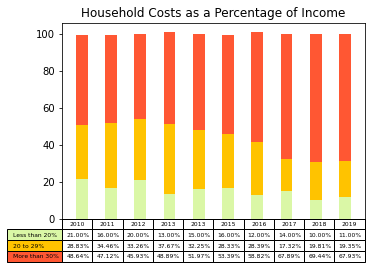

In [133]:
# you need to look at the census data csv in order to find the corresponding
# columns for each income bracket for example: df['S2503_C02_033E'][city_num], the first
# column is what you need to change.
index = df1_dict[income]
index2 = df2_dict[income]

for df in dfs1:
    totalpercent = float(df['S2503_C01_0' + str(index) + 'E'][city_num])
    inc75_lessthan20.append(float(df['S2503_C01_0' + str(index+1) + 'E'][city_num])/totalpercent * 100)
    inc75_20to29.append(float(df['S2503_C01_0' + str(index+2) + 'E'][city_num])/totalpercent * 100)
    inc75_morethan30.append(float(df['S2503_C01_0' + str(index+3) + 'E'][city_num])/totalpercent * 100)

for df in dfs2:
    totalpercent = float(df['S2503_C01_0' + str(index2) + 'E'][city_num])
    inc75_lessthan20.append(float(df['S2503_C01_0' + str(index2+1) + 'E'][city_num])/totalpercent * 100)
    inc75_20to29.append(float(df['S2503_C01_0' + str(index2+2) + 'E'][city_num])/totalpercent * 100)
    inc75_morethan30.append(float(df['S2503_C01_0' + str(index2+3) + 'E'][city_num])/totalpercent * 100)  

for df in dfs3:
    totalpercent = float(df['S2503_C02_0' + str(index2) + 'E'][city_num])
    inc75_lessthan20.append(float(df['S2503_C02_0' + str(index2+1) + 'E'][city_num])/totalpercent * 100)
    inc75_20to29.append(float(df['S2503_C02_0' + str(index2+2) + 'E'][city_num])/totalpercent * 100)
    inc75_morethan30.append(float(df['S2503_C02_0' + str(index2+3) + 'E'][city_num])/totalpercent * 100)
     
    
data = [inc75_lessthan20 , inc75_20to29, inc75_morethan30]
columns = ('2010', '2011', '2012', '2013', '2013', '2015', '2016', '2017', '2018', '2019')
rows = ['Less than 20%', '20 to 29%', 'More than 30%']

# Get some pastel shades for the colors
colors = ['#DAF7A6', '#FFC300', '#FF5733']
n_rows = len(data)


# formatting bar chart
index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

correction = [[0]*10]
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset += data[row]
    cell_text.append([int(x) for x in y_offset])
    cell_text[-1] = np.subtract(cell_text[-1], correction[-1])
    cell_text[-1] = ['%.2f' % x + '%' for x in cell_text[-1]]
    correction.append(list(y_offset))
# Reverse colors and text labels to display the last value at the top.


# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.xticks([])
# change title depending on which city you are currently displaying
plt.title('Household Costs as a Percentage of Income')

plt.show()